# Clase 4: Unión y Combinación de Datos

En análisis de datos, a menudo necesitamos combinar datos de diferentes fuentes para obtener una visión más completa y significativa. Pandas, una biblioteca popular de Python para manipulación y análisis de datos, proporciona varios métodos para unir y combinar conjuntos de datos, como `merge`, `concat` y `append`.

In [ ]:
import pandas as pd
from google.colab import files

In [43]:
file_up = files.upload()

Saving Seguros.xlsx to Seguros.xlsx


In [80]:
Seg_Ene = pd.read_excel('/content/Seguros.xlsx')
Seg_Ene.drop_duplicates('Id_Sistema_Cotizacion', inplace = True)
Seg_Ene.head(3)

,Id_Seguro,Id_Sistema_Cotizacion,Fecha_Creacion,Valor_Seguro,Fecha_Carga
0,5,2255182,2022-11-25 15:37:02.253,3.360269e+09,2022-11-28
1,5,2259024,2022-11-28 19:06:24.767,2.898128e+09,2022-11-28
2,3,2259221,2022-11-28 19:35:05.113,4.747616e+09,2022-11-28


In [86]:
Seg_Anual = pd.read_excel('/content/Seguros.xlsx', sheet_name = 'Seguros_2')
Seg_Anual.drop_duplicates('Id_Sistema_Cotizacion', inplace = True)
Seg_Anual.head(3)

,Id,Id_Seguro,Id_Sistema_Seguro,Id_Cotizacion,Id_Sistema_Cotizacion,Fecha_Creacion,Valor_Seguro,Fecha_Carga
0,16,5,5,40938,2258680,2022-11-28 17:12:23.103,2.898128e+09,2022-11-28
1,17,5,5,38888,2257309,2022-11-26 18:22:07.870,2.897164e+09,2022-11-28
2,18,5,5,38933,2257348,2022-11-26 18:25:10.960,2.897164e+09,2022-11-28


In [73]:
Seg = pd.read_excel('/content/Seguros.xlsx', sheet_name = 'TB Seguros')
Seg.head(3)

,ID,NOMBRE,TIPO,DESCRIPCION,TS_CREACION,TS_ACTUALIZACION,ELIMINADO,ASEGURADORA_ID,OBLIGATORIO,DURACION,ACTIVO
0,1,Seguro de Vida,Crédito,Vive tranquilo con este seguro de vida.,2017-05-16 21:06:10.313,2017-05-16 21:06:10.607,0,3,0,NaN,1
1,2,Seguro de Cesantía o Despido Involuntario,Crédito,NaN,2017-05-14 23:14:05.247,2017-05-16 03:18:23.413,0,1,0,1.0,1
2,3,Seguro de Desgravamen,Crédito,Gran seguro de desgravamen.,2017-05-16 21:06:10.313,2017-07-17 18:41:08.820,0,3,1,1.0,1


1. JOIN

Las operaciones de unión (join) combinan filas de dos DataFrame basándose en una o más claves comunes. Pandas ofrece el método `merge` para realizaar diferentes tipos de unión.

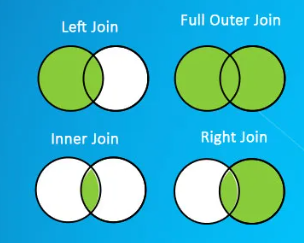

El método `merge` en pandas se utiliza para combinar dos DataFrames en función de una o varias columnas comunes, similar a la operación de unión en SQL. Ofrece una variedad de argumentos para controlar cómo se realiza la unión y qué datos se incluyen en el resultado. Aquí tienes una descripción exhaustiva de todos los argumentos del método merge:

**Argumentos Principales:**
* DataFrame 1

* DataFrame 2

* `how (str, default 'inner')`: Tipo de unión a realizar. Puede ser 'left', 'right', 'outer' o 'inner'.

* `on (str or list of str, optional)`: Nombre de la columna o lista de nombres de columnas comunes sobre las cuales realizar la unión. Si no se especifica, pandas intentará unir los DataFrames basándose en las columnas que tienen los mismos nombres en ambos DataFrames.

**Argumentos Adicionales:**

* `left_on y right_on (str or list of str, optional)`: Nombres de las columnas a utilizar en el DataFrame izquierdo y derecho, respectivamente, para realizar la unión. Útil cuando las columnas de unión tienen diferentes nombres en los DataFrames.

* `left_index y right_index (bool, default False)`: Si es True, utiliza los índices del DataFrame izquierdo y derecho, respectivamente, como claves de unión.

* `suffixes (tuple of (str, str), default ('_x', '_y'))`: Sufijos a añadir a los nombres de las columnas en caso de que existan columnas con el mismo nombre en ambos DataFrames.

* `sort (bool, default False)`: Ordenar las claves de unión en orden lexicográfico. Mejora el rendimiento si está habilitado, pero se deshabilita de forma predeterminada ya que no es necesario para todos los casos.

* `indicator (bool or str, default False)`: Agrega una columna especial _merge al DataFrame resultante que indica la fuente de cada fila (left_only, right_only, o both).


In [125]:
print('Seguros enero:', Seg_Ene.shape)
print('Seguros Anual:', Seg_Anual.shape)
print('Tabla Hechos Seguros:', Seg.shape)

Seguros enero: (729, 5)
Seguros Anual: (1428, 8)
Tabla Hechos Seguros: (5, 11)


In [82]:
df_inner = pd.merge(Seg_Ene,
                    Seg,
                    left_on = 'Id_Seguro',
                    right_on = 'ID',
                    how = 'inner')
print('Tamaño Resultante:', df_inner.shape)
df_inner.head(3)

Tamaño Resultante: (729, 16)


,Id_Seguro,Id_Sistema_Cotizacion,Fecha_Creacion,Valor_Seguro,Fecha_Carga,ID,NOMBRE,TIPO,DESCRIPCION,TS_CREACION,TS_ACTUALIZACION,ELIMINADO,ASEGURADORA_ID,OBLIGATORIO,DURACION,ACTIVO
0,5,2255182,2022-11-25 15:37:02.253,3.360269e+09,2022-11-28,5,Seguro Básico,Vehículo,Seguro básico vehículo.,2017-05-16 21:06:10.313,2017-06-15 04:39:41.967,0,3,0,1.0,1
1,5,2259024,2022-11-28 19:06:24.767,2.898128e+09,2022-11-28,5,Seguro Básico,Vehículo,Seguro básico vehículo.,2017-05-16 21:06:10.313,2017-06-15 04:39:41.967,0,3,0,1.0,1
2,5,2258002,2022-11-28 14:18:51.937,2.898128e+09,2022-11-28,5,Seguro Básico,Vehículo,Seguro básico vehículo.,2017-05-16 21:06:10.313,2017-06-15 04:39:41.967,0,3,0,1.0,1


In [83]:
df_inner = pd.merge(Seg_Ene,
                    Seg_Anual,
                    on = 'Id_Sistema_Cotizacion',
                    how = 'inner')
print('Tamaño Resultante:', df_inner.shape)
df_inner.dropna(inplace = True)
df_inner.head(3)

Tamaño Resultante: (526, 12)


,Id_Seguro_x,Id_Sistema_Cotizacion,Fecha_Creacion_x,Valor_Seguro_x,Fecha_Carga_x,Id,Id_Seguro_y,Id_Sistema_Seguro,Id_Cotizacion,Fecha_Creacion_y,Valor_Seguro_y,Fecha_Carga_y
0,3,2259221,2022-11-28 19:35:05.113,4.747616e+09,2022-11-28,436,5,5,41287,2022-11-28 20:03:01.723,9.809834e+09,2022-11-28
1,3,2257869,2022-11-28 13:21:51.740,4.129203e+09,2022-11-28,653,5,5,39809,2022-11-28 13:21:51.740,2.898128e+09,2022-11-28
2,5,2258002,2022-11-28 14:18:51.937,2.898128e+09,2022-11-28,1988,3,3,39923,2022-11-28 14:16:15.103,8.260336e+09,2022-11-28


In [84]:
df_inner = pd.merge(Seg_Ene,
                    Seg_Anual,
                    on = 'Id_Sistema_Cotizacion',
                    how = 'left')
print('Tamaño Resultante:', df_inner.shape)
df_inner.head(3)

Tamaño Resultante: (729, 12)


,Id_Seguro_x,Id_Sistema_Cotizacion,Fecha_Creacion_x,Valor_Seguro_x,Fecha_Carga_x,Id,Id_Seguro_y,Id_Sistema_Seguro,Id_Cotizacion,Fecha_Creacion_y,Valor_Seguro_y,Fecha_Carga_y
0,5,2255182,2022-11-25 15:37:02.253,3.360269e+09,2022-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,5,2259024,2022-11-28 19:06:24.767,2.898128e+09,2022-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3,2259221,2022-11-28 19:35:05.113,4.747616e+09,2022-11-28,436.0,5.0,5.0,41287.0,2022-11-28 20:03:01.723,9.809834e+09,2022-11-28


In [85]:
df_inner = pd.merge(Seg_Ene,
                    Seg_Anual,
                    on = 'Id_Sistema_Cotizacion',
                    how = 'right')
print('Tamaño Resultante:', df_inner.shape)
df_inner.head(3)

Tamaño Resultante: (1428, 12)


,Id_Seguro_x,Id_Sistema_Cotizacion,Fecha_Creacion_x,Valor_Seguro_x,Fecha_Carga_x,Id,Id_Seguro_y,Id_Sistema_Seguro,Id_Cotizacion,Fecha_Creacion_y,Valor_Seguro_y,Fecha_Carga_y
0,NaN,2258680,NaN,NaN,NaT,16,5,5,40938,2022-11-28 17:12:23.103,2.898128e+09,2022-11-28
1,NaN,2257309,NaN,NaN,NaT,17,5,5,38888,2022-11-26 18:22:07.870,2.897164e+09,2022-11-28
2,NaN,2257348,NaN,NaN,NaT,18,5,5,38933,2022-11-26 18:25:10.960,2.897164e+09,2022-11-28


In [66]:
df_inner = pd.merge(Seg_Ene,
                    Seg_Anual,
                    on = 'Id_Sistema_Cotizacion',
                    how = 'outer')
print('Tamaño Resultante:', df_inner.shape)
df_inner.head(3)

Tamaño Resultante: (2503, 12)


,Id_Seguro_x,Id_Sistema_Cotizacion,Fecha_Creacion_x,Valor_Seguro_x,Fecha_Carga_x,Id,Id_Seguro_y,Id_Sistema_Seguro,Id_Cotizacion,Fecha_Creacion_y,Valor_Seguro_y,Fecha_Carga_y
0,5.0,2255182,2022-11-25 15:37:02.253,3.360269e+09,2022-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,5.0,2259024,2022-11-28 19:06:24.767,2.898128e+09,2022-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3.0,2259024,2022-11-28 19:06:24.767,5.373618e+09,2022-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaT


# **Ejercicio**:

* Se desea conocer el nombre del seguro para cada cotización. Utilice la función merge para realizar esto
* Calcular el valor promedio del seguro para cada tipo de seguro, adicinalmente calcular cual es el seguro más económico.

In [108]:
Precio_Seg = pd.merge(Seg_Anual,
                      Seg[['ID', 'NOMBRE']],
                      left_on = 'Id_Seguro',
                      right_on = 'ID',
                      how = 'left').drop(columns = 'ID').rename(columns = {'NOMBRE': 'Nombre_Seg'})
Precio_Seg.head()

,Id,Id_Seguro,Id_Sistema_Seguro,Id_Cotizacion,Id_Sistema_Cotizacion,Fecha_Creacion,Valor_Seguro,Fecha_Carga,Nombre_Seg
0,16,5,5,40938,2258680,2022-11-28 17:12:23.103,2.898128e+09,2022-11-28,Seguro Básico
1,17,5,5,38888,2257309,2022-11-26 18:22:07.870,2.897164e+09,2022-11-28,Seguro Básico
2,18,5,5,38933,2257348,2022-11-26 18:25:10.960,2.897164e+09,2022-11-28,Seguro Básico
3,19,5,5,40849,2258591,2022-11-28 16:42:38.170,2.898128e+09,2022-11-28,Seguro Básico
4,20,5,5,41235,2259277,2022-11-28 20:14:23.803,2.898128e+09,2022-11-28,Seguro Básico


In [111]:
Precio_Seg.groupby('Nombre_Seg')['Valor_Seguro'].mean()

Nombre_Seg
Seguro Básico                                3.716571e+09
Seguro Full                                  2.521276e+10
Seguro de Cesantía o Despido Involuntario    3.791085e+09
Seguro de Desgravamen                        5.497248e+09
Seguro de Vida                               2.100907e+09
Name: Valor_Seguro, dtype: float64

In [122]:
Precio_Seg.groupby('Nombre_Seg')['Valor_Seguro'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Nombre_Seg,,,,,,,,
Seguro de Vida,129.0,2.100907e+09,1.254772e+09,5.101554e+08,1.052082e+09,1.932850e+09,2.891840e+09,6.645985e+09
Seguro Básico,406.0,3.716571e+09,2.572326e+09,1.490035e+09,2.898128e+09,2.898128e+09,3.361945e+09,3.110816e+10
Seguro de Cesantía o Despido Involuntario,17.0,3.791085e+09,2.489059e+09,1.039206e+09,1.712423e+09,3.634037e+09,4.568600e+09,1.134963e+10
Seguro de Desgravamen,875.0,5.497248e+09,3.579572e+09,0.000000e+00,3.498107e+09,4.880602e+09,6.516361e+09,3.191059e+10
Seguro Full,1.0,2.521276e+10,NaN,2.521276e+10,2.521276e+10,2.521276e+10,2.521276e+10,2.521276e+10


**Concatenación usando concat y append**
Además de las operaciones de unión, pandas proporciona métodos para concatenar DataFrames a lo largo de un eje.
* La concatenación simplemente une DataFrames a lo largo de un eje específico.

* El método append es una forma conveniente de agregar filas a un DataFrame existente.



In [124]:
df_Concat = pd.concat([Seg_Anual, Seg_Ene], ignore_index = True)
df_Concat.shape

(2157, 8)

In [147]:
nueva_cotizacion = pd.DataFrame({'Id_Seguro': [3],
                                 'Id_Sistema_Cotizacion': [2258080],
                                 'Fecha_Creacion': ['2022-11-28 14:42:03.017'],
                                 'Valor_Seguro': [5399820000]	,
                                 'Fecha_Carga': ['2022-11-28']})
df_append = Seg_Ene.append(nueva_cotizacion, ignore_index= True)
df_append.tail(10)

<ipython-input-147-491d5b063af5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = Seg_Ene.append(nueva_cotizacion, ignore_index= True)
/usr/local/lib/python3.10/dist-packages/lida/components/summarizer.py:82: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  samples = pd.Series(non_null_values).sample(n_samples, random_state=42).tolist()


,Id_Seguro,Id_Sistema_Cotizacion,Fecha_Creacion,Valor_Seguro,Fecha_Carga
720,1,2259241,2022-11-28 19:42:36.667,1.447542e+09,2022-11-28 00:00:00
721,3,2259465,2022-11-28 21:11:31.360,5.501414e+09,2022-11-28 00:00:00
722,3,2259162,2022-11-28 20:35:21.890,3.832484e+09,2022-11-28 00:00:00
723,3,2258926,2022-11-28 18:34:36.603,4.650507e+09,2022-11-28 00:00:00
724,3,2258465,2022-11-28 16:03:19.013,2.442387e+09,2022-11-28 00:00:00
725,1,2257754,2022-11-28 12:00:08.177,3.067204e+09,2022-11-28 00:00:00
726,3,2258159,2022-11-28 15:38:10.223,1.949759e+10,2022-11-28 00:00:00
727,3,2258642,2022-11-28 16:59:06.380,1.071288e+10,2022-11-28 00:00:00
728,3,2258080,2022-11-28 14:42:03.017,5.399820e+09,2022-11-28 00:00:00
729,3,2258080,2022-11-28 14:42:03.017,5.399820e+09,2022-11-28
